In [79]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt

In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
df= pd.read_excel('finaldata.xlsx',engine='openpyxl')

In [5]:
df.head()

,CUSTOMER_NUMBER,DATE_OF_BIRTH,GENDER,STREET_ADDRESS,COUNTRY,CUSTOMER_NAME,SALES_SCHEME_CODE,SALES_STRATEGY_TYPE,MARITAL_STATUS,DAYS_SINCE_CUSTOMER_ENGAGEMENT,...,TOTAL_HOUSEHOLD_ANNUAL_EXPENDITURE,GROCERY_WEEKLY_SPENDING,TOTAL_EXPENDATURE_TO_DATE,NO_ITEMS_PURCHASED,WEEKLY_FUEL_EXPENDATURE,SALES_CALL_STATUS,STORES_VISITED,LOYALTY_CARD_STATUS,LOYALTY_GIFT_SENT,SALE
0,1208538993,1959-06-25,Male,7304 Arizona Place,Philippines,kerr colloby,H1,Supplement,S,16,...,6700,220,67980,2,60,Due,5,Inactive,0,1
1,2994516667,1989-02-25,Male,0551 Mariners Cove Street,Russia,bernardo hartop,F1,Basic,D,33,...,6400,150,19350,5,90,Up-to-Date,7,Active,0,1
2,5694078640,2004-03-13,Male,03 6th Hill,Thailand,agustin pattrick,F1,Supplement,S,15,...,42100,90,11970,3,70,Missed,2,Active,1,0
3,1008558214,1966-02-24,Female,89 Rieder Terrace,Philippines,rubie canto,F1,Urgent,D,18,...,25300,170,32980,3,70,Missed,5,Active,0,1
4,8008647159,2006-01-10,Male,12268 Browning Street,Poland,tobie morrowe,F1,Urgent,D,18,...,47500,50,26800,2,60,Up-to-Date,8,Active,0,1


In [6]:
import scipy.stats as stats


In [7]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [8]:
import statsmodels.api as sm

# CHI SQUARE TEST

# The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

# Using chi2 test to find if there is any association btw gender and marital status

# H0 - There is no relationship among these two vars

# h1 - There is a relationship

In [9]:
dataset_table=pd.crosstab(df['GENDER'],df['MARITAL_STATUS'])

In [10]:
dataset_table

MARITAL_STATUS,D,M,S
GENDER,,,
Female,156,127,205
Male,185,109,218


In [11]:
dataset_table.values 

array([[156, 127, 205],
       [185, 109, 218]])

In [12]:
#Observed Values
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[156 127 205]
 [185 109 218]]


In [13]:
val=stats.chi2_contingency(dataset_table)

In [14]:
val

(3.664795124509191,
 0.1600294269447409,
 2,
 array([[166.408, 115.168, 206.424],
        [174.592, 120.832, 216.576]]))

In [15]:


Expected_Values=val[3]



In [67]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:3])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 2


In [68]:


from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]



In [69]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 2.167784050194833


In [70]:


critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)



critical_value: 5.991464547107979


In [71]:


#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)



p-value: 0.3382763800751766
Significance level:  0.05
Degree of Freedom:  2
p-value: 0.3382763800751766


In [72]:


if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")



Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


In [22]:
df.head()

,CUSTOMER_NUMBER,DATE_OF_BIRTH,GENDER,STREET_ADDRESS,COUNTRY,CUSTOMER_NAME,SALES_SCHEME_CODE,SALES_STRATEGY_TYPE,MARITAL_STATUS,DAYS_SINCE_CUSTOMER_ENGAGEMENT,...,TOTAL_HOUSEHOLD_ANNUAL_EXPENDITURE,GROCERY_WEEKLY_SPENDING,TOTAL_EXPENDATURE_TO_DATE,NO_ITEMS_PURCHASED,WEEKLY_FUEL_EXPENDATURE,SALES_CALL_STATUS,STORES_VISITED,LOYALTY_CARD_STATUS,LOYALTY_GIFT_SENT,SALE
0,1208538993,1959-06-25,Male,7304 Arizona Place,Philippines,kerr colloby,H1,Supplement,S,16,...,6700,220,67980,2,60,Due,5,Inactive,0,1
1,2994516667,1989-02-25,Male,0551 Mariners Cove Street,Russia,bernardo hartop,F1,Basic,D,33,...,6400,150,19350,5,90,Up-to-Date,7,Active,0,1
2,5694078640,2004-03-13,Male,03 6th Hill,Thailand,agustin pattrick,F1,Supplement,S,15,...,42100,90,11970,3,70,Missed,2,Active,1,0
3,1008558214,1966-02-24,Female,89 Rieder Terrace,Philippines,rubie canto,F1,Urgent,D,18,...,25300,170,32980,3,70,Missed,5,Active,0,1
4,8008647159,2006-01-10,Male,12268 Browning Street,Poland,tobie morrowe,F1,Urgent,D,18,...,47500,50,26800,2,60,Up-to-Date,8,Active,0,1


# One sample t-test

# Checking if means of the sample and population of household expenditure are equal

# h0 -> There is no difference among the sample/population means 
# h1 -> There is a difference

In [37]:
expenditure = df['TOTAL_HOUSEHOLD_ANNUAL_EXPENDITURE'].to_list()

In [31]:
expenditure

[6700,
 6400,
 42100,
 25300,
 47500,
 16700,
 3100,
 6900,
 30600,
 27200,
 400,
 37400,
 7400,
 18300,
 31200,
 29900,
 36600,
 57800,
 32000,
 41300,
 10800,
 17900,
 25000,
 20700,
 49200,
 21500,
 26600,
 3600,
 3700,
 49600,
 10000,
 29000,
 21100,
 19100,
 26900,
 3000,
 16500,
 12000,
 35100,
 32000,
 10900,
 20100,
 3500,
 15600,
 900,
 5900,
 38600,
 9700,
 19800,
 8200,
 5400,
 17300,
 44900,
 9400,
 11300,
 25500,
 37700,
 3200,
 7800,
 22400,
 38100,
 22700,
 12700,
 3500,
 27900,
 40600,
 11600,
 6800,
 15700,
 11300,
 14400,
 40200,
 6900,
 38500,
 7600,
 12600,
 12900,
 35000,
 43800,
 20700,
 14900,
 800,
 30300,
 22400,
 35400,
 16600,
 37100,
 8200,
 25500,
 43900,
 32100,
 24300,
 21000,
 16400,
 18000,
 13200,
 21300,
 6900,
 34900,
 18000,
 22000,
 4300,
 5300,
 9800,
 36200,
 22400,
 14900,
 33600,
 37200,
 19700,
 21300,
 23800,
 22000,
 21600,
 29200,
 33200,
 5000,
 35500,
 13500,
 32300,
 4600,
 38300,
 1100,
 33600,
 8300,
 4600,
 21000,
 9400,
 19500,
 1800

In [25]:
len(expenditure)

1000

In [32]:
expenditure_mean=np.mean(expenditure)
print(expenditure_mean)

21493.3


# The mean expenditure is 21493

In [38]:
## Lets take sample

sample_size=30
expenditure_sample=np.random.choice(expenditure,sample_size)

In [28]:


from scipy.stats import ttest_1samp



In [39]:


ttest,p_value=ttest_1samp(expenditure_sample,30)



In [40]:


print(p_value)



2.1253728738742358e-08


In [41]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


# We are accepting the alternate hypothesis that says there is a difference between the sample mean and the population mean of the total household expenditure

In [42]:
df.head()

,CUSTOMER_NUMBER,DATE_OF_BIRTH,GENDER,STREET_ADDRESS,COUNTRY,CUSTOMER_NAME,SALES_SCHEME_CODE,SALES_STRATEGY_TYPE,MARITAL_STATUS,DAYS_SINCE_CUSTOMER_ENGAGEMENT,...,TOTAL_HOUSEHOLD_ANNUAL_EXPENDITURE,GROCERY_WEEKLY_SPENDING,TOTAL_EXPENDATURE_TO_DATE,NO_ITEMS_PURCHASED,WEEKLY_FUEL_EXPENDATURE,SALES_CALL_STATUS,STORES_VISITED,LOYALTY_CARD_STATUS,LOYALTY_GIFT_SENT,SALE
0,1208538993,1959-06-25,Male,7304 Arizona Place,Philippines,kerr colloby,H1,Supplement,S,16,...,6700,220,67980,2,60,Due,5,Inactive,0,1
1,2994516667,1989-02-25,Male,0551 Mariners Cove Street,Russia,bernardo hartop,F1,Basic,D,33,...,6400,150,19350,5,90,Up-to-Date,7,Active,0,1
2,5694078640,2004-03-13,Male,03 6th Hill,Thailand,agustin pattrick,F1,Supplement,S,15,...,42100,90,11970,3,70,Missed,2,Active,1,0
3,1008558214,1966-02-24,Female,89 Rieder Terrace,Philippines,rubie canto,F1,Urgent,D,18,...,25300,170,32980,3,70,Missed,5,Active,0,1
4,8008647159,2006-01-10,Male,12268 Browning Street,Poland,tobie morrowe,F1,Urgent,D,18,...,47500,50,26800,2,60,Up-to-Date,8,Active,0,1


In [43]:
df_male= df[df['GENDER']=='Male']

In [44]:
df_female= df[df['GENDER']=='Female']

# Two sample T-Test

# H0 - There is no difference in household spending patterns of male and female

# H1 = There is a difference in expenditure

In [50]:
df_male_expenditure = df_male['TOTAL_HOUSEHOLD_ANNUAL_EXPENDITURE'].to_list()



In [47]:
df_female_expenditure = df_female['TOTAL_HOUSEHOLD_ANNUAL_EXPENDITURE'].to_list()


In [48]:
_,p_value=stats.ttest_ind(a=df_male_expenditure,b=df_female_expenditure,equal_var=False)



In [49]:


if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")



we are accepting null hypothesis


# Chi2 test on loyalty card and sales strategy 

# I am really intrigued about the sales strategy of the company and i wld like to see if the loyalty card status is what influences the strategy 

In [51]:
dataset_table=pd.crosstab(df['LOYALTY_CARD_STATUS'],df['SALES_STRATEGY_TYPE'])

In [52]:
#Observed Values
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[404  93 151  60]
 [136  28  63  23]
 [ 22   8  10   2]]


In [53]:
val=stats.chi2_contingency(dataset_table)

In [54]:
val

(4.278578622260949,
 0.63903373497152,
 6,
 array([[397.896,  91.332, 158.592,  60.18 ],
        [140.5  ,  32.25 ,  56.   ,  21.25 ],
        [ 23.604,   5.418,   9.408,   3.57 ]]))

In [55]:
Expected_Values=val[3]

In [62]:
no_of_rows=len(dataset_table.iloc[0:3,0])
no_of_columns=len(dataset_table.iloc[0,0:4])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05


Degree of Freedom:- 6


In [63]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]


In [64]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 12.591587243743977


In [65]:

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)


p-value: 0.903638704232846
Significance level:  0.05
Degree of Freedom:  6
p-value: 0.903638704232846


In [66]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")


Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


# We are accepting the null hypothesis and the company does not take the loyalty card status into account when devising the sales strategy

In [73]:
df.columns

Index(['CUSTOMER_NUMBER', 'DATE_OF_BIRTH', 'GENDER', 'STREET_ADDRESS',
       'COUNTRY', 'CUSTOMER_NAME', 'SALES_SCHEME_CODE', 'SALES_STRATEGY_TYPE',
       'MARITAL_STATUS', 'DAYS_SINCE_CUSTOMER_ENGAGEMENT', 'REG_DATE',
       'START_DATE', 'OCC_CODE', 'TOTAL_HOUSEHOLD_ANNUAL_EXPENDITURE',
       'GROCERY_WEEKLY_SPENDING', 'TOTAL_EXPENDATURE_TO_DATE',
       'NO_ITEMS_PURCHASED', 'WEEKLY_FUEL_EXPENDATURE', 'SALES_CALL_STATUS',
       'STORES_VISITED', 'LOYALTY_CARD_STATUS', 'LOYALTY_GIFT_SENT', 'SALE'],
      dtype='object')

In [76]:
len(df['DAYS_SINCE_CUSTOMER_ENGAGEMENT'].unique())

56

In [77]:
df2 = df[['DAYS_SINCE_CUSTOMER_ENGAGEMENT','TOTAL_HOUSEHOLD_ANNUAL_EXPENDITURE']]

In [81]:
pip install seaborn

     |████████████████████████████████| 292 kB 4.4 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [82]:
import seaborn as sns


# Checking if there is any correlation btw expenditure and customer engagement 

<AxesSubplot:>

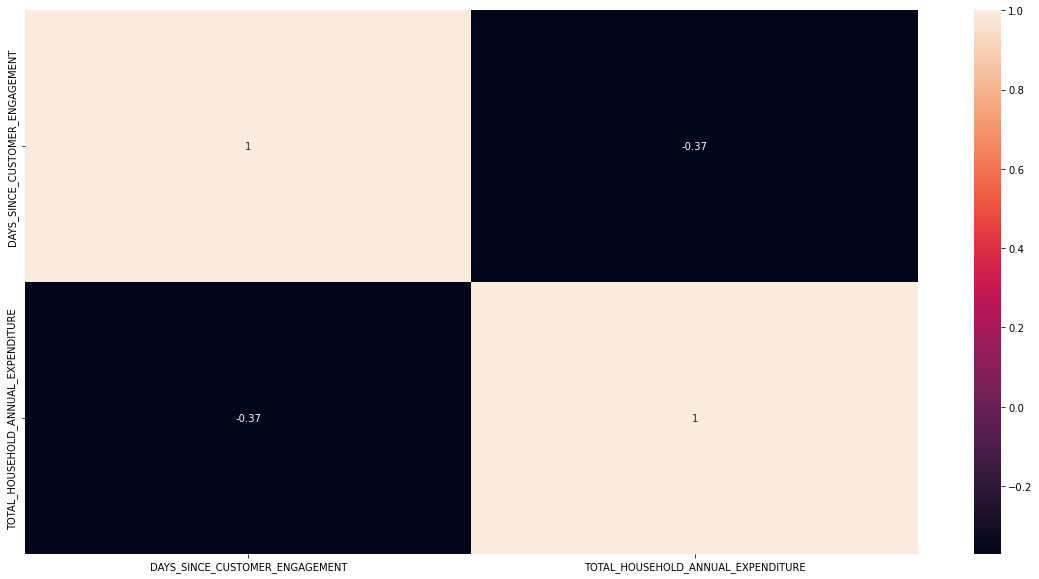

In [83]:

plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(),annot=True)

# From the above graph it is clear that it is negatively correlated so increase of expenditure decreases the customer engagement 

<AxesSubplot:title={'center':'Correlation with Response variable'}>

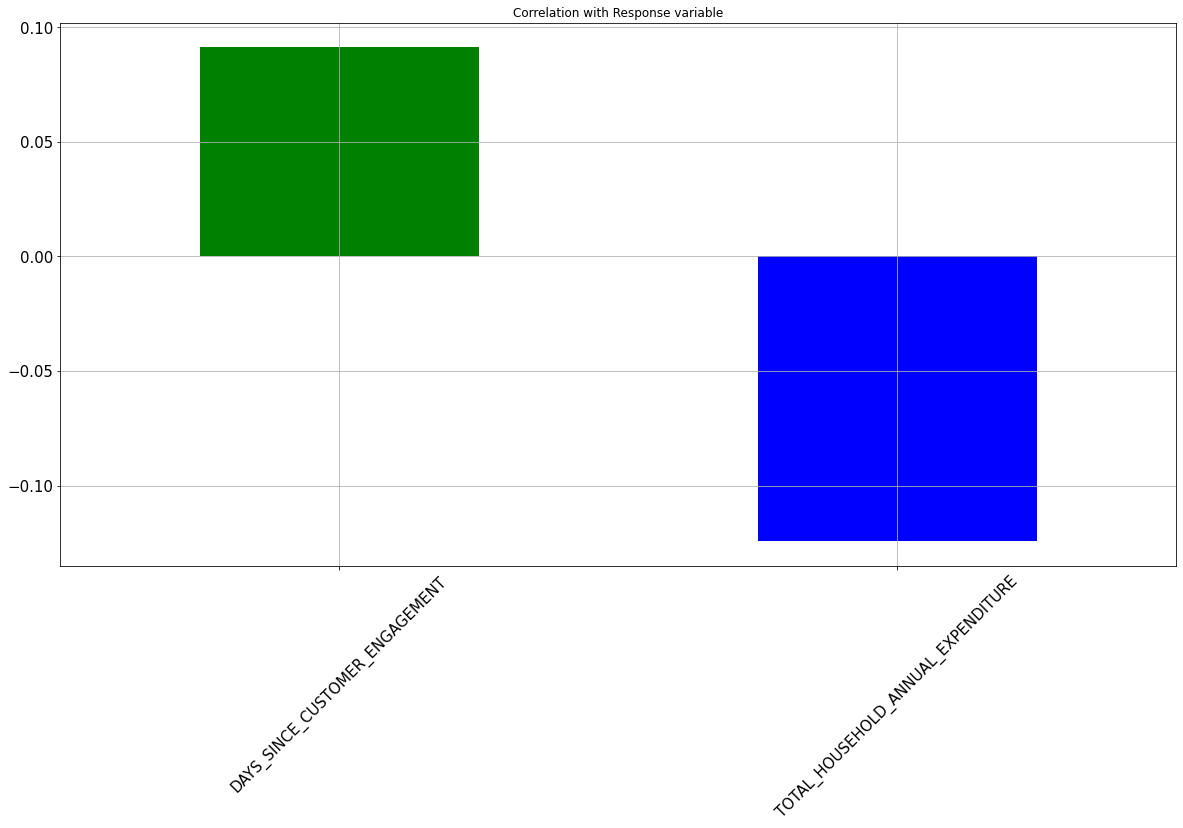

In [85]:
## Correlation with Response Variable
color=tuple(["g", "b","r","y","k"])
df2.corrwith(df.SALE).plot.bar(figsize=(20,10),
              title = 'Correlation with Response variable',
              fontsize = 15, rot = 45,
              grid = True,color=color)

# Correlation with response variable SALE

# More the customer engages, he/she is more likely to make a purchase

In [86]:
df.columns

Index(['CUSTOMER_NUMBER', 'DATE_OF_BIRTH', 'GENDER', 'STREET_ADDRESS',
       'COUNTRY', 'CUSTOMER_NAME', 'SALES_SCHEME_CODE', 'SALES_STRATEGY_TYPE',
       'MARITAL_STATUS', 'DAYS_SINCE_CUSTOMER_ENGAGEMENT', 'REG_DATE',
       'START_DATE', 'OCC_CODE', 'TOTAL_HOUSEHOLD_ANNUAL_EXPENDITURE',
       'GROCERY_WEEKLY_SPENDING', 'TOTAL_EXPENDATURE_TO_DATE',
       'NO_ITEMS_PURCHASED', 'WEEKLY_FUEL_EXPENDATURE', 'SALES_CALL_STATUS',
       'STORES_VISITED', 'LOYALTY_CARD_STATUS', 'LOYALTY_GIFT_SENT', 'SALE'],
      dtype='object')

In [ ]:
# df['SALES_CALL_STATUS'].value_counts()

# One way anova

It tell whether two or more groups are similar or not based on their mean similarity and f-score.

In [100]:
df_anova = df[['NO_ITEMS_PURCHASED','SALES_CALL_STATUS']]



In [101]:
grps = pd.unique(df_anova.SALES_CALL_STATUS.values)

In [102]:
grps   ##Unique values

array(['Due', 'Up-to-Date', 'Missed'], dtype=object)

In [106]:
d_data = {grp:df_anova['NO_ITEMS_PURCHASED'][df_anova.SALES_CALL_STATUS == grp] for grp in grps}

In [107]:
d_data

{'Due': 0      2
 7      5
 9      2
 10     3
 13     3
       ..
 990    4
 994    1
 995    2
 996    2
 997    2
 Name: NO_ITEMS_PURCHASED, Length: 377, dtype: int64,
 'Up-to-Date': 1      5
 4      2
 5      1
 6      6
 8      3
       ..
 986    4
 988    3
 991    1
 992    3
 993    0
 Name: NO_ITEMS_PURCHASED, Length: 441, dtype: int64,
 'Missed': 2      3
 3      3
 12     4
 22     3
 23     1
       ..
 959    2
 973    2
 984    5
 998    3
 999    6
 Name: NO_ITEMS_PURCHASED, Length: 182, dtype: int64}

In [108]:
F, p = stats.f_oneway(d_data['Due'], d_data['Up-to-Date'], d_data['Missed'])

In [109]:
print(p)

0.6282161242443227


In [110]:
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

accept null hypothesis


# We accept the null hypothesis that there is no difference among the means of sales call status

In [111]:
df.head()

,CUSTOMER_NUMBER,DATE_OF_BIRTH,GENDER,STREET_ADDRESS,COUNTRY,CUSTOMER_NAME,SALES_SCHEME_CODE,SALES_STRATEGY_TYPE,MARITAL_STATUS,DAYS_SINCE_CUSTOMER_ENGAGEMENT,...,TOTAL_HOUSEHOLD_ANNUAL_EXPENDITURE,GROCERY_WEEKLY_SPENDING,TOTAL_EXPENDATURE_TO_DATE,NO_ITEMS_PURCHASED,WEEKLY_FUEL_EXPENDATURE,SALES_CALL_STATUS,STORES_VISITED,LOYALTY_CARD_STATUS,LOYALTY_GIFT_SENT,SALE
0,1208538993,1959-06-25,Male,7304 Arizona Place,Philippines,kerr colloby,H1,Supplement,S,16,...,6700,220,67980,2,60,Due,5,Inactive,0,1
1,2994516667,1989-02-25,Male,0551 Mariners Cove Street,Russia,bernardo hartop,F1,Basic,D,33,...,6400,150,19350,5,90,Up-to-Date,7,Active,0,1
2,5694078640,2004-03-13,Male,03 6th Hill,Thailand,agustin pattrick,F1,Supplement,S,15,...,42100,90,11970,3,70,Missed,2,Active,1,0
3,1008558214,1966-02-24,Female,89 Rieder Terrace,Philippines,rubie canto,F1,Urgent,D,18,...,25300,170,32980,3,70,Missed,5,Active,0,1
4,8008647159,2006-01-10,Male,12268 Browning Street,Poland,tobie morrowe,F1,Urgent,D,18,...,47500,50,26800,2,60,Up-to-Date,8,Active,0,1


In [112]:
df['LOYALTY_CARD_STATUS'].value_counts()

Active      708
Inactive    250
Lost         42
Name: LOYALTY_CARD_STATUS, dtype: int64

# Two way Anova

# Does the SALES STRATEGY (FOR  BOTH GENDERS) have any difference in MAKING A PURCHASE

In [113]:
from statsmodels.formula.api import ols

In [128]:
model = ols('SALE ~ C(SALES_STRATEGY_TYPE) + C(GENDER) + C(SALES_STRATEGY_TYPE):C(GENDER)', data=df).fit()

In [129]:
result = sm.stats.anova_lm(model, type=2)

In [130]:
result

,df,sum_sq,mean_sq,F,PR(>F)
C(SALES_STRATEGY_TYPE),3.0,2.828695,0.942898,3.789654,0.010162
C(GENDER),1.0,0.027953,0.027953,0.112349,0.737557
C(SALES_STRATEGY_TYPE):C(GENDER),3.0,0.325257,0.108419,0.435752,0.727459
Residual,992.0,246.818095,0.248809,NaN,NaN


# Interpretations

Since the p-value for SALES_STRATEGY_TYPE is  less than .05, this means it has  a statistically significant effect on a Customer making a purchase.